<a href="https://colab.research.google.com/github/GnanaTrishala/IIITHYDERABAD_AIML_COURSE/blob/main/TRISHALA_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [16]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaandindividualspeciescanbedistinguishedbytheirfurcoatpatternssixvalidextinctspeciesofgiraffafromafricaandpakistanareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupon

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

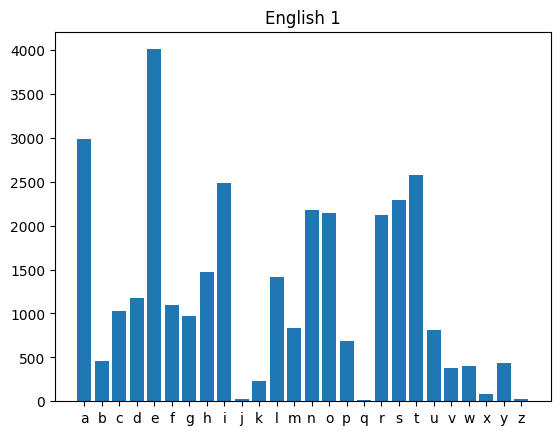

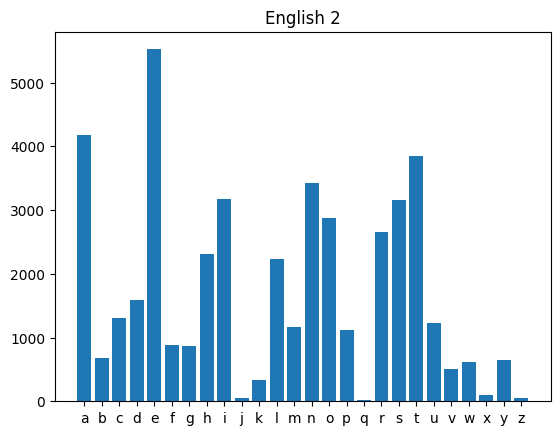

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

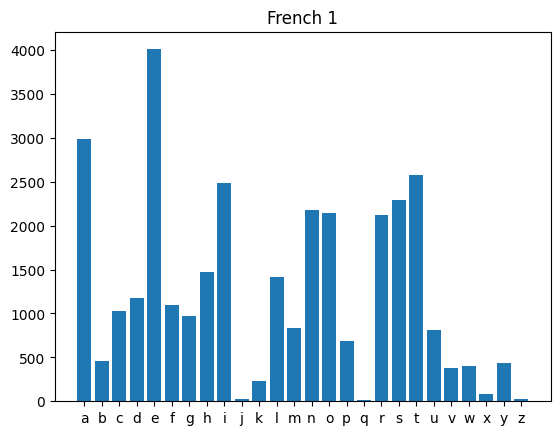

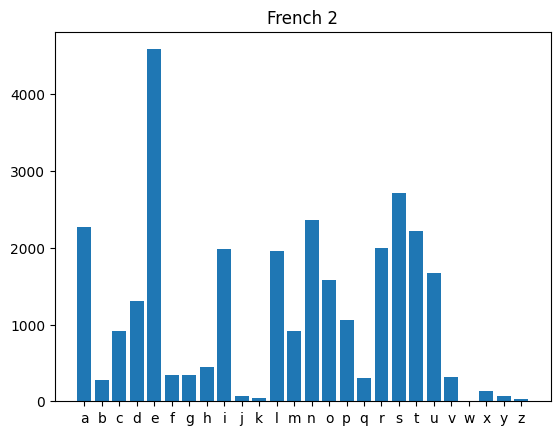

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

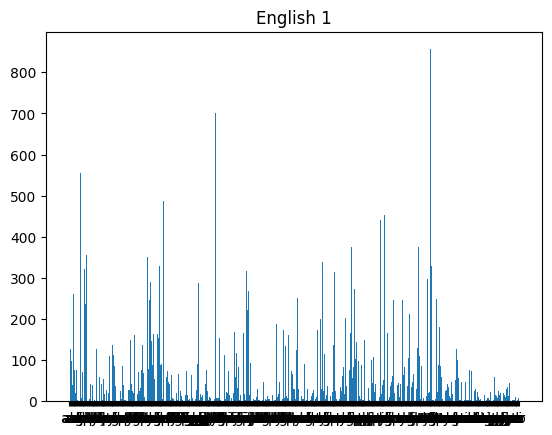

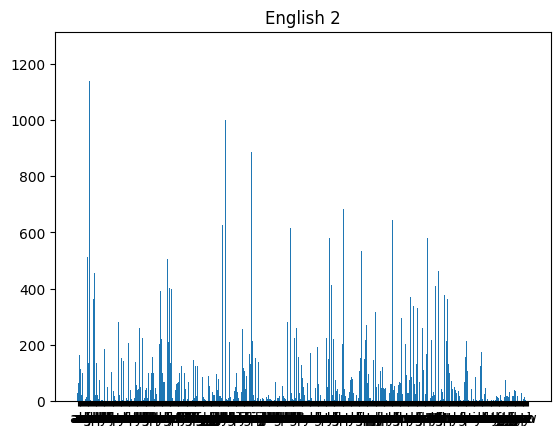

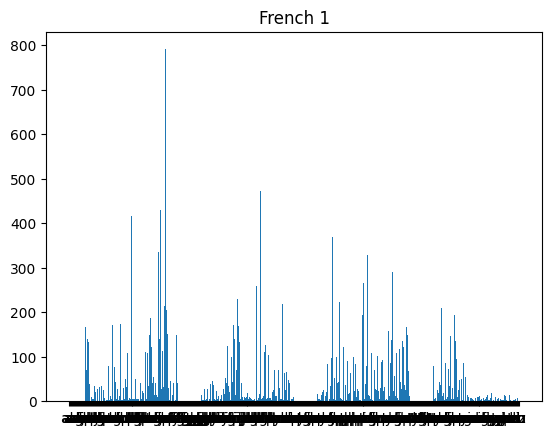

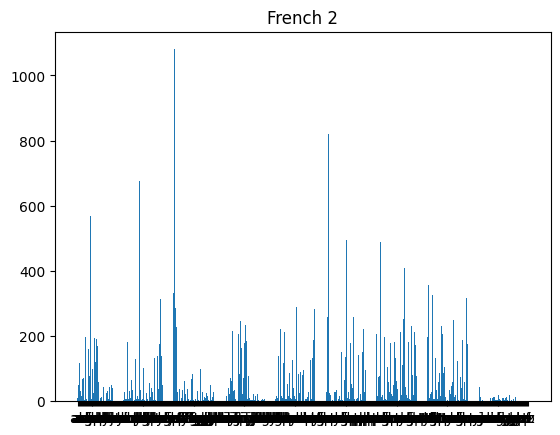

In [ ]:
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt

bigram_eng1 = Counter(ngrams(eng1, 2))  # English 1
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2, 2))  # English 2
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1, 2))  # French 1
plothistogram(bigram_fr1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2, 2))  # French 2
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

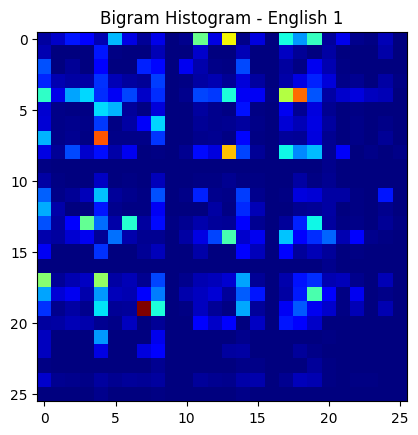

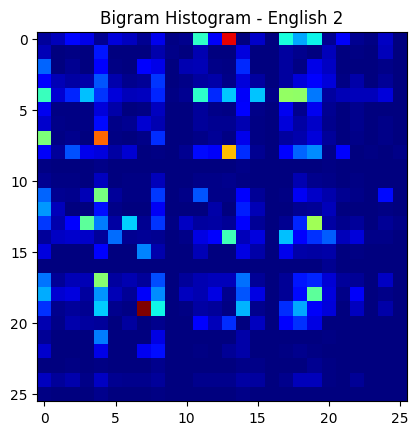

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.title('Bigram Histogram - English 1')
plt.show()

bieng2 = plotbihistogram(bigram_eng2)
plt.title('Bigram Histogram - English 2')
plt.show()

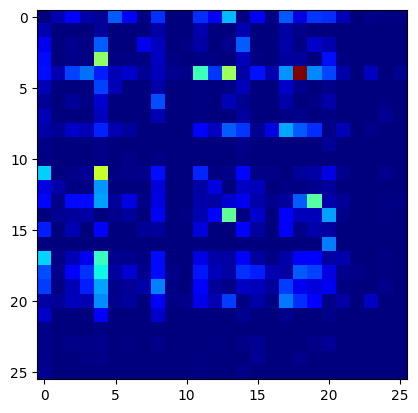

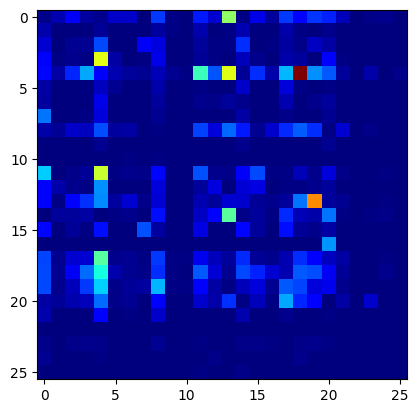

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 856.0
('h', 'e') : 700.0
('e', 's') : 681.0
('i', 'n') : 604.0
('a', 'n') : 554.0
('e', 'r') : 486.0
('r', 'e') : 454.0
('r', 'a') : 440.0
('a', 'l') : 409.0
('n', 'd') : 402.0

English 2:
('t', 'h') : 1251.0
('a', 'n') : 1138.0
('h', 'e') : 998.0
('i', 'n') : 886.0
('n', 't') : 683.0
('e', 'r') : 662.0
('e', 's') : 657.0
('r', 'e') : 645.0
('h', 'a') : 628.0
('l', 'e') : 616.0

French 1:
('e', 's') : 791.0
('l', 'e') : 472.0
('e', 'n') : 429.0
('d', 'e') : 416.0
('o', 'n') : 370.0
('n', 't') : 360.0
('e', 'l') : 335.0
('r', 'e') : 329.0
('s', 'e') : 291.0
('r', 'a') : 265.0

French 2:
('e', 's') : 1080.0
('n', 't') : 820.0
('d', 'e') : 676.0
('e', 'n') : 672.0
('l', 'e') : 639.0
('a', 'n') : 567.0
('o', 'n') : 495.0
('r', 'e') : 490.0
('e', 'l') : 456.0
('s', 'e') : 409.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

english_text = ["the elephant is a large mammal"]
french_text = ["l'éléphant est un grand mammifère"]
hindi_text = ["हाथी एक बड़ा स्तनपायी है"]

vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
X = vectorizer.fit_transform(english_text + french_text + hindi_text)
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df)

    a   e   g   i   l   m   u   ए   ब   स  ...  यी  स्  हा  है  ़ा  ा   ाथ  \
0   1   1   0   1   1   1   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   1   1   0   0   1   1   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   1   1   1  ...   1   1   1   1   1   1   1   

   ाय  ी   ्त  
0   0   0   0  
1   0   0   0  
2   1   2   1  

[3 rows x 69 columns]


In [18]:
uni_vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 1))
unigrams = uni_vectorizer.fit_transform(english_text)
print(unigrams.shape[1])

bi_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
bigrams = bi_vectorizer.fit_transform(english_text)
print(bigrams.shape[1])

13
27


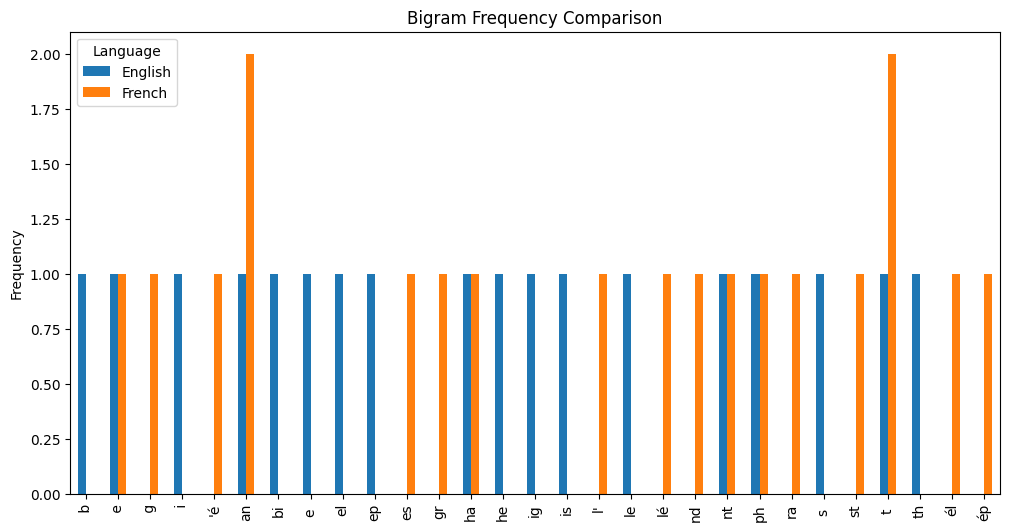

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

texts = ["the elephant is big", "l'éléphant est grand"]
langs = ["English", "French"]
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
X = vectorizer.fit_transform(texts).toarray()
df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
df["Language"] = langs
df.set_index("Language").T.plot(kind='bar', figsize=(12, 6))
plt.title("Bigram Frequency Comparison")
plt.ylabel("Frequency")
plt.show()

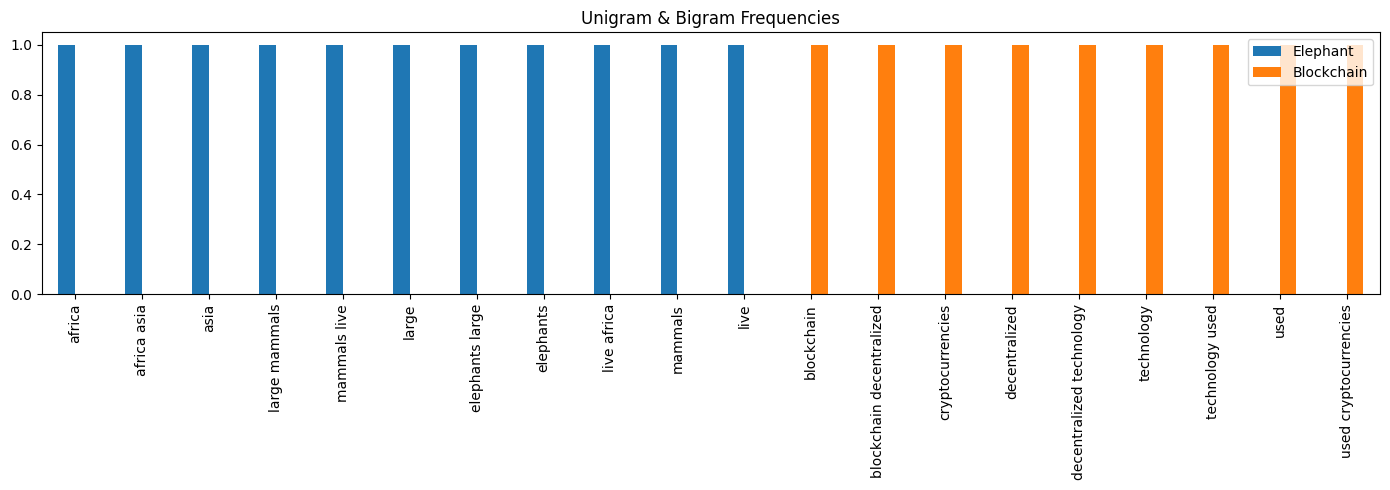

In [20]:
topic1 = ["Elephants are large mammals that live in Africa and Asia."]
topic2 = ["Blockchain is a decentralized technology used in cryptocurrencies."]

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(topic1 + topic2)

df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=["Elephant", "Blockchain"])
df.T.sort_values(by="Elephant", ascending=False).plot(kind='bar', figsize=(14, 5), title="Unigram & Bigram Frequencies")
plt.tight_layout()
plt.show()

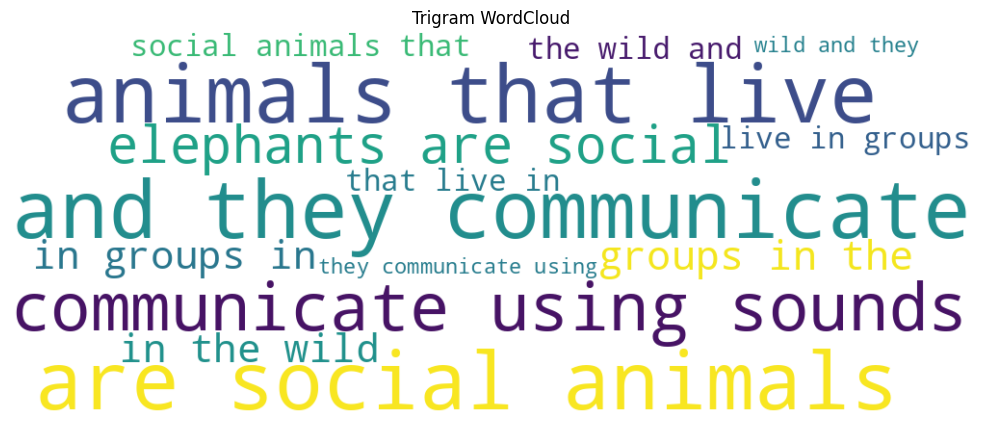

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "elephants are social animals that live in groups in the wild and they communicate using sounds"
vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform([text])
frequencies = dict(zip(vectorizer.get_feature_names_out(), X.toarray()[0]))

wc = WordCloud(width=1000, height=400, background_color="white").generate_from_frequencies(frequencies)
plt.figure(figsize=(15, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Trigram WordCloud")
plt.show()

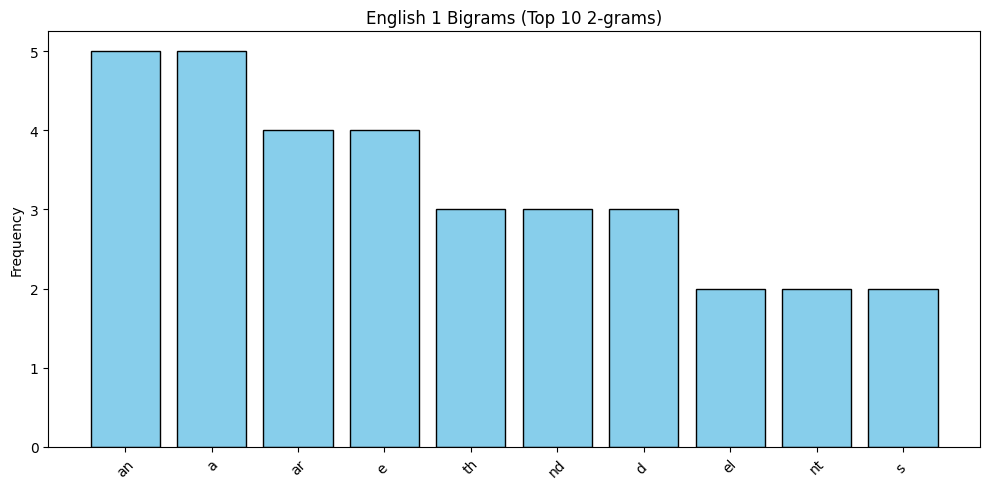

Top English Bigrams: [(('a', 'n'), 5), ((' ', 'a'), 5), (('a', 'r'), 4), (('e', ' '), 4), (('t', 'h'), 3), (('n', 'd'), 3), (('d', ' '), 3), (('e', 'l'), 2), (('n', 't'), 2), (('s', ' '), 2)]


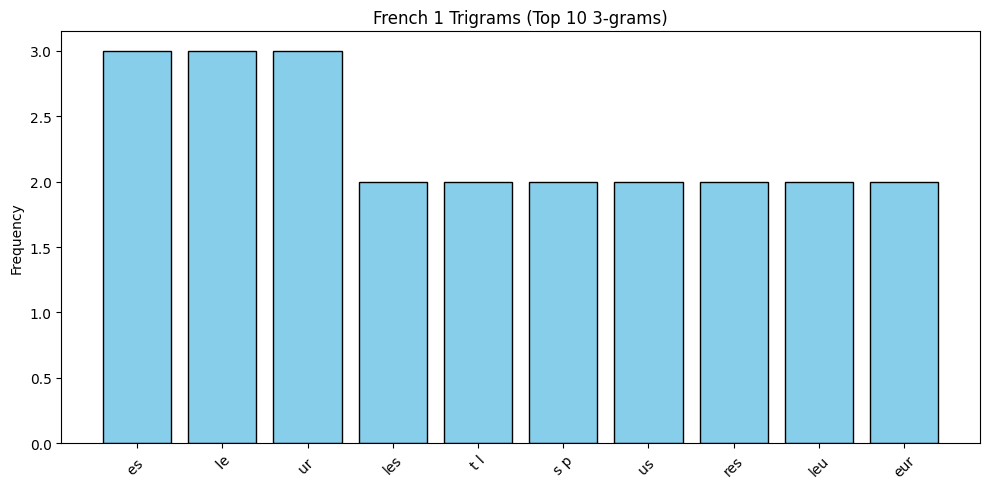

Top French Trigrams: [(('e', 's', ' '), 3), ((' ', 'l', 'e'), 3), (('u', 'r', ' '), 3), (('l', 'e', 's'), 2), (('t', ' ', 'l'), 2), (('s', ' ', 'p'), 2), (('u', 's', ' '), 2), (('r', 'e', 's'), 2), (('l', 'e', 'u'), 2), (('e', 'u', 'r'), 2)]


In [22]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams

# Function to plot n-gram histogram and return data
def plot_ngram_histogram(text, n=2, top_n=10, title='N-Gram Frequency'):
    ngram_counts = Counter(ngrams(text, n))
    most_common = ngram_counts.most_common(top_n)

    # Convert n-grams to readable strings
    labels = [''.join(gram) for gram, _ in most_common]
    counts = [count for _, count in most_common]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color='skyblue', edgecolor='black')
    plt.title(f'{title} (Top {top_n} {n}-grams)')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Return as a list of tuples or dictionary
    return most_common  # or use dict(most_common) if you prefer

# Sample texts
eng1 = "elephants are the largest land animals on earth and are known for their intelligence and memory".lower()
fr1 = "les éléphants sont les plus grands animaux terrestres connus pour leur intelligence et leur mémoire".lower()

# Example usage:
eng1_bigrams = plot_ngram_histogram(eng1, n=2, top_n=10, title='English 1 Bigrams')
print("Top English Bigrams:", eng1_bigrams)

fr1_trigrams = plot_ngram_histogram(fr1, n=3, top_n=10, title='French 1 Trigrams')
print("Top French Trigrams:", fr1_trigrams)

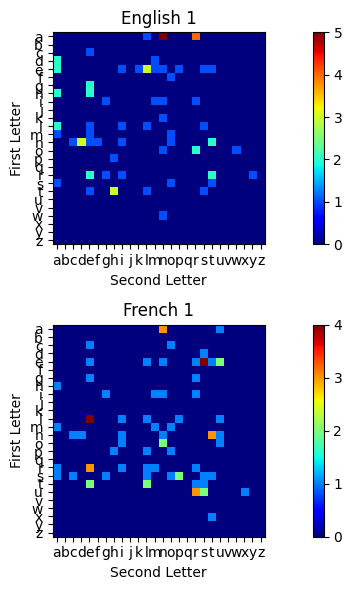

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
import string

def bigram_heatmap(text, title='Bigram Heatmap'):
    # Filter only lowercase alphabetic characters
    text = ''.join([c for c in text.lower() if c in string.ascii_lowercase])

    # Count bigrams
    bigrams = Counter(ngrams(text, 2))

    # Create 26x26 matrix for bigrams
    matrix = np.zeros((26, 26))

    for (c1, c2), count in bigrams.items():
        i = ord(c1) - ord('a')
        j = ord(c2) - ord('a')
        matrix[i][j] = count

    # Plot heatmap
    plt.imshow(matrix, cmap='jet', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Second Letter')
    plt.ylabel('First Letter')
    plt.xticks(ticks=np.arange(26), labels=list(string.ascii_lowercase))
    plt.yticks(ticks=np.arange(26), labels=list(string.ascii_lowercase))

# Example:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
bigram_heatmap(eng1, title="English 1")

plt.subplot(2, 1, 2)
bigram_heatmap(fr1, title="French 1")

plt.tight_layout()
plt.show()

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [24]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [25]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

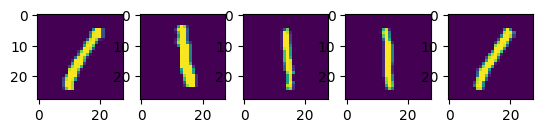

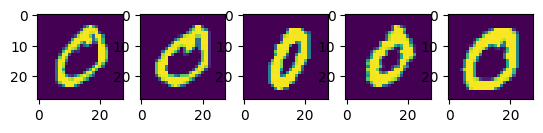

In [26]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [27]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

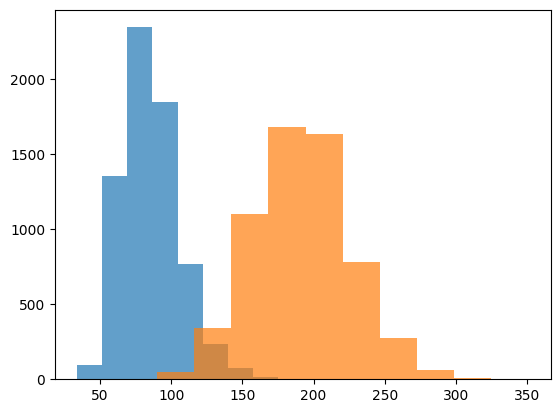

In [28]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [29]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

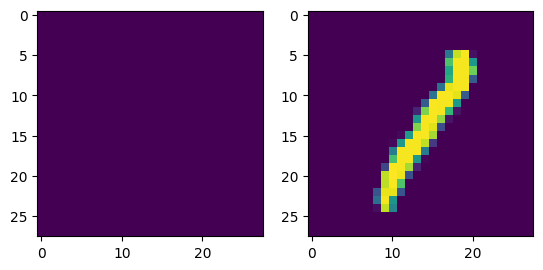

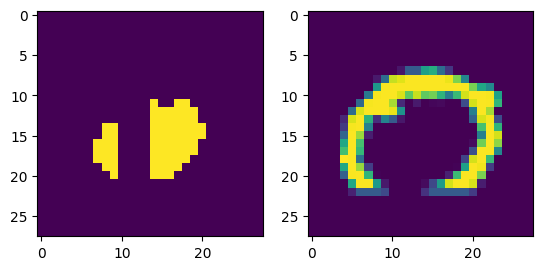

In [30]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

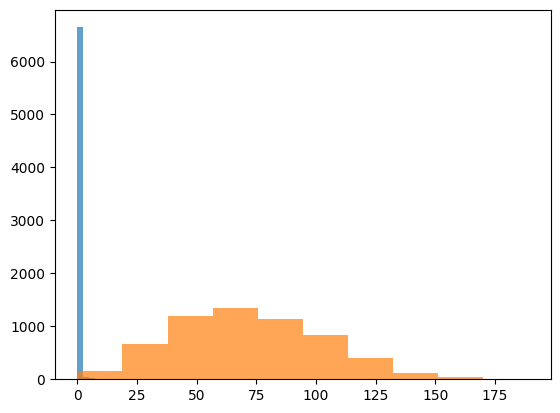

In [31]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [32]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

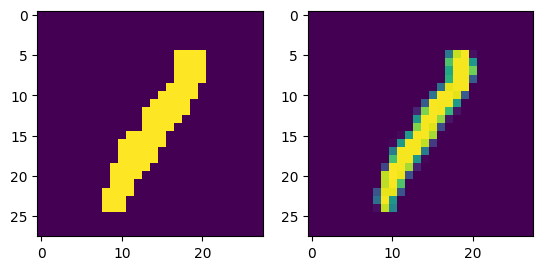

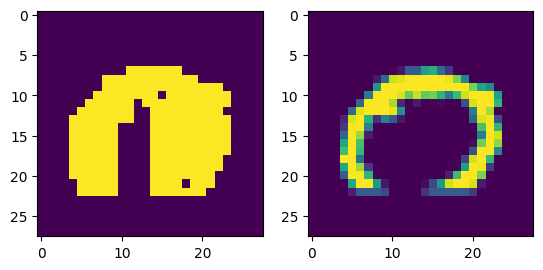

In [33]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

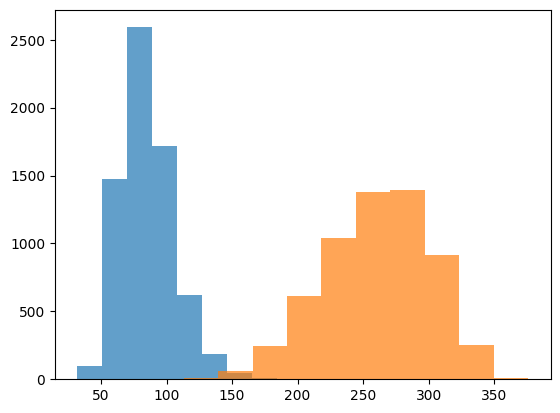

In [34]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [35]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

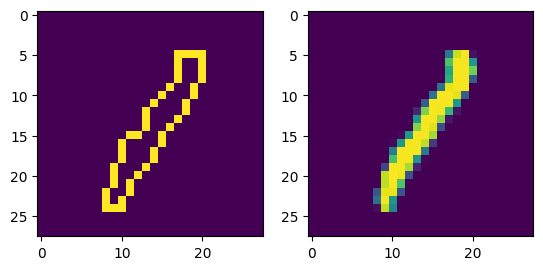

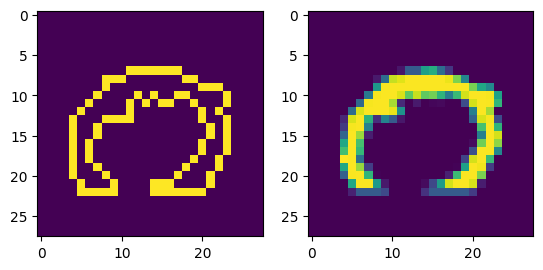

In [36]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

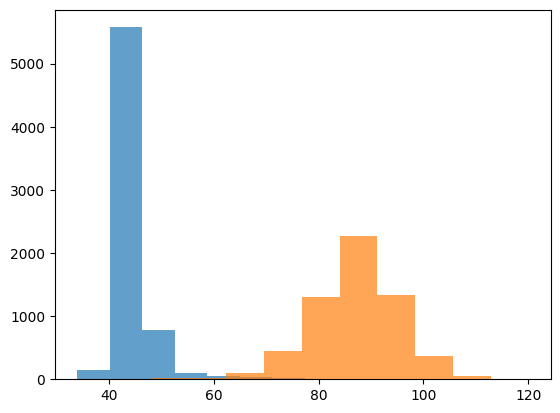

In [37]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

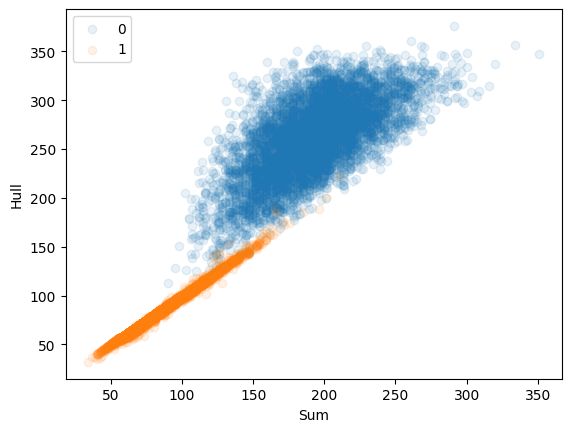

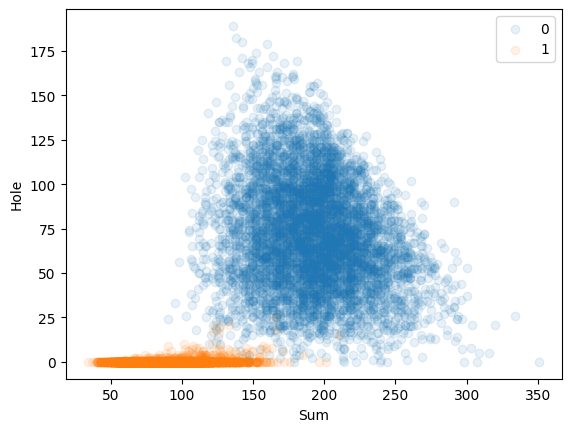

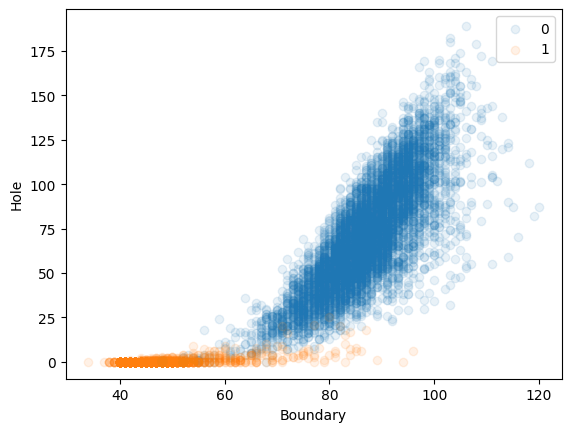

In [38]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [39]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

In [42]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from itertools import combinations
import numpy as np

digits = load_digits(n_class=2)
X, y = digits.images, digits.target

# Basic shape check to avoid empty slice
assert X.shape[1] == 8 and X.shape[2] == 8, "Expected 8x8 images in load_digits"

# Define features safely
f1 = np.mean(X, axis=(1, 2))
f2 = np.var(X, axis=(1, 2))
f3 = np.mean(X[:, :, :4], axis=(1, 2))  # Left half
f4 = np.mean(X[:, :, 4:], axis=(1, 2))  # Right half

features = np.vstack([f1, f2, f3, f4]).T

# Check for NaNs
if np.isnan(features).any():
    features = np.nan_to_num(features)

best_acc = 0
best_combo = None

for combo in combinations(range(4), 2):
    X_train, X_test, y_train, y_test = train_test_split(features[:, combo], y, test_size=0.3, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    if acc > best_acc:
        best_acc = acc
        best_combo = combo

print("Best combo:", best_combo)
print("Best accuracy:", best_acc)

Best combo: (0, 1)
Best accuracy: 0.9722222222222222


1. Created a DataFrame for Visualization

Combined the extracted features (mean, variance, left_mean, right_mean) into a pandas DataFrame.

Added the class labels (y) as a column for color-coding.


2. Visualized with a Pair Plot (Seaborn)

Used sns.pairplot() to show scatter plots of every pair of features.

Helped observe which features best separate the digit classes (0 vs 1).

3. Applied PCA for Dimensionality Reduction

Used Principal Component Analysis (PCA) to reduce 4D features into:

2D (for 2D plotting)

3D (for deeper visual separation insight)


4. Plotted PCA-Reduced Features

2D Plot: Used plt.scatter() to plot 2 principal components.

3D Plot: Used Axes3D from mpl_toolkits to create a 3D scatter plot.


5. Observed Class Separation

In all visualizations, data points were color-coded by class (0 or 1) to see how well the features help in separating the classes visually.

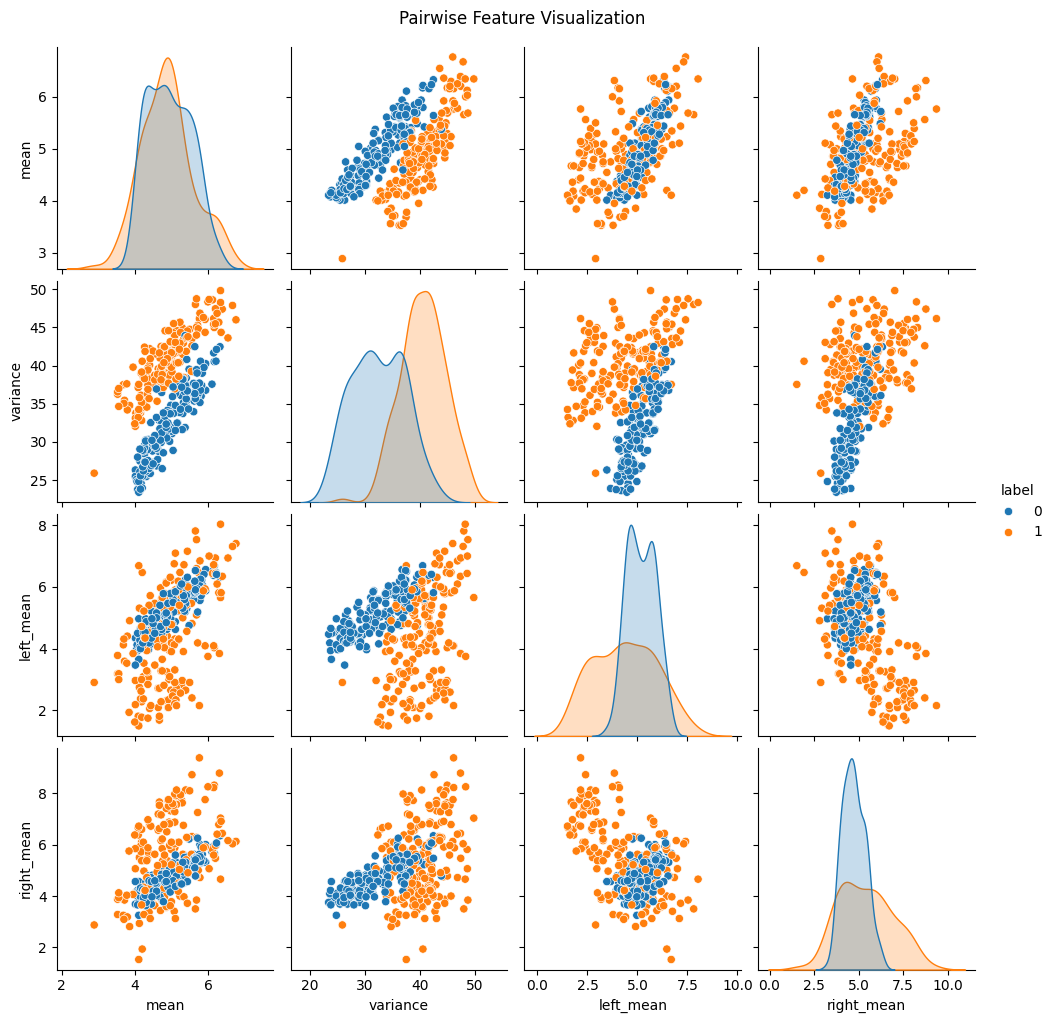

In [43]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame for Seaborn
df = pd.DataFrame(features, columns=['mean', 'variance', 'left_mean', 'right_mean'])
df['label'] = y

# Plot pairwise relationships
sns.pairplot(df, hue='label')
plt.suptitle("Pairwise Feature Visualization", y=1.02)
plt.show()

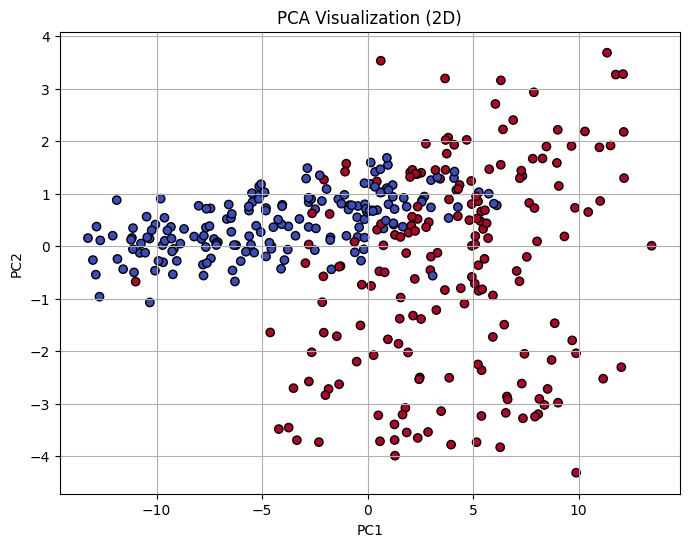

In [44]:
from sklearn.decomposition import PCA

# Reduce features to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)

# Plot PCA-reduced features
plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("PCA Visualization (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

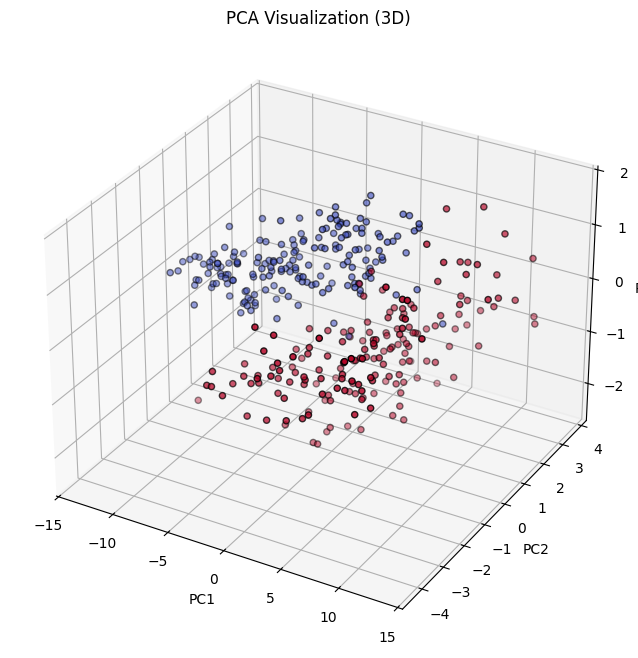

In [45]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
reduced_3d = pca_3d.fit_transform(features)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_3d[:, 0], reduced_3d[:, 1], reduced_3d[:, 2], c=y, cmap='coolwarm', edgecolors='k')
ax.set_title("PCA Visualization (3D)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [46]:
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits(n_class=2)
X = digits.images

def vertical_symmetry(img):
    mid = img.shape[1] // 2
    left = img[:, :mid]
    right = img[:, mid:]
    right_flipped = np.fliplr(right)
    return np.mean(np.abs(left - right_flipped))

def center_intensity(img):
    center = img[3:5, 3:5]  # 4 pixels in center for 8x8
    return np.mean(center)

def edge_intensity(img):
    top = img[0, :]
    bottom = img[-1, :]
    left = img[:, 0]
    right = img[:, -1]
    edges = np.concatenate([top, bottom, left, right])
    return np.mean(edges)

symmetry = np.array([vertical_symmetry(img) for img in X])
center = np.array([center_intensity(img) for img in X])
edges = np.array([edge_intensity(img) for img in

f1 = np.mean(X, axis=(1, 2))
f2 = np.var(X, axis=(1, 2))
f3 = np.mean(X[:, :, :4], axis=(1, 2))
f4 = np.mean(X[:, :, 4:], axis=(1, 2))

features = np.vstack([f1, f2, f3, f4, symmetry, center, edges]).T

print(features.shape)

(360, 7)


In [47]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.images  # (n_samples, 8, 8)
y = digits.target  # digits 0-9

def vertical_symmetry(img):
    mid = img.shape[1] // 2
    left = img[:, :mid]
    right = img[:, mid:]
    right_flipped = np.fliplr(right)
    return np.mean(np.abs(left - right_flipped))

def center_intensity(img):
    center = img[3:5, 3:5]
    return np.mean(center)

def edge_intensity(img):
    top = img[0, :]
    bottom = img[-1, :]
    left = img[:, 0]
    right = img[:, -1]
    edges = np.concatenate([top, bottom, left, right])
    return np.mean(edges)

# Compute features for all images
f1 = np.mean(X, axis=(1, 2))
f2 = np.var(X, axis=(1, 2))
f3 = np.mean(X[:, :, :4], axis=(1, 2))
f4 = np.mean(X[:, :, 4:], axis=(1, 2))
symmetry = np.array([vertical_symmetry(img) for img in X])
center = np.array([center_intensity(img) for img in X])
edges = np.array([edge_intensity(img) for img in X])

features = np.vstack([f1, f2, f3, f4, symmetry, center, edges]).T

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy on all 10 digit classes: {acc:.4f}")

Accuracy on all 10 digit classes: 0.6944


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



Multiclass classification accuracy: 0.6630


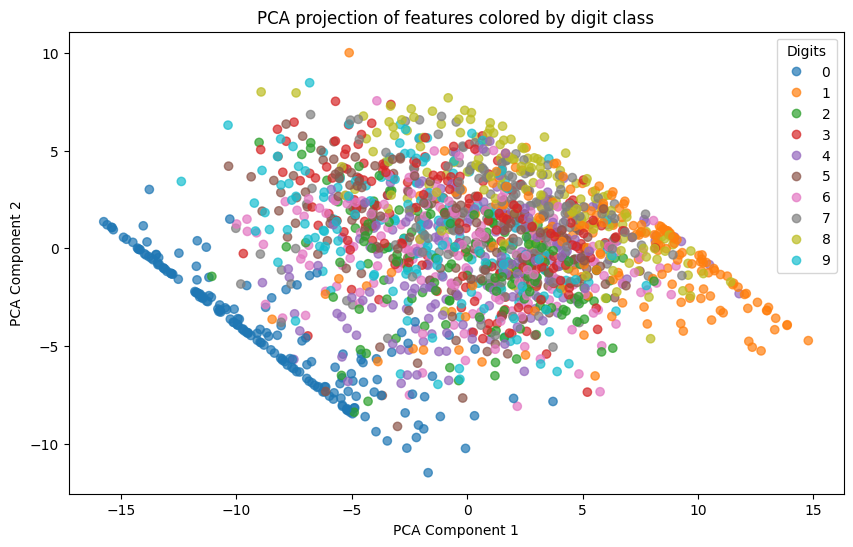

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.images
y = digits.target

def vertical_symmetry(img):
    mid = img.shape[1] // 2
    left = img[:, :mid]
    right = img[:, mid:]
    right_flipped = np.fliplr(right)
    return np.mean(np.abs(left - right_flipped))

def center_intensity(img):
    center = img[3:5, 3:5]
    return np.mean(center)

def edge_intensity(img):
    top = img[0, :]
    bottom = img[-1, :]
    left = img[:, 0]
    right = img[:, -1]
    edges = np.concatenate([top, bottom, left, right])
    return np.mean(edges)

f1 = np.mean(X, axis=(1, 2))
f2 = np.var(X, axis=(1, 2))
f3 = np.mean(X[:, :, :4], axis=(1, 2))
f4 = np.mean(X[:, :, 4:], axis=(1, 2))
symmetry = np.array([vertical_symmetry(img) for img in X])
center = np.array([center_intensity(img) for img in X])
edges = np.array([edge_intensity(img) for img in X])

features = np.vstack([f1, f2, f3, f4, symmetry, center, edges]).T

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000, multi_class='ovr')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Multiclass classification accuracy: {acc:.4f}")

pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("PCA projection of features colored by digit class")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

1. Which is the best combination of features?

The best feature combination depends on which features give the highest accuracy or best separation between classes.

We test different subsets of features by training models and comparing their performance.

Often, a small subset of meaningful features (like symmetry and edge intensity) can outperform using all features together.

It’s like picking the perfect playlist — some combos just vibe better than others. You gotta test different mixes and see which one hits the highest accuracy note.

Sometimes less is more. A couple of killer features like symmetry and edge vibes might beat a whole cluttered feature squad.

2. How would you test or visualize four or more features?

Testing: Using classification models (e.g., logistic regression, SVM) with cross-validation to measure accuracy for different feature sets.

Visualization: Using dimensionality reduction methods like PCA, t-SNE, or UMAP to project high-dimensional features into 2D or 3D space.

Plotting the reduced features with color coding for classes to visually inspect class separability.

Testing’s easy: throw those features into your favorite model, like logistic regression, and see who wins the accuracy battle royale.

For visualization — since humans aren’t great at seeing beyond 3D — use PCA or t-SNE to squish those features down to 2D or 3D and then paint the classes like a colorful graffiti wall.


3. Can you come up with your own features?

Yes, we can design custom features based on domain knowledge, such as:

Aspect ratio or stroke width of digits

Number of connected components or holes

Histogram of gradients (HOG) or edge directions

Pixel intensity statistics for specific regions


More complex features generally improve classification but require more effort to design or compute.


4. Will these features work for different classes other than 0 and 1?

Basic features can separate simple digits like 0 and 1 well but may struggle with similar-looking digits.

For multiple classes (0-9), these features may not be enough for high accuracy.

Richer features or models like deep neural networks are usually needed for good multiclass classification.


5. What will happen if we take more than two classes at a time?

Classification becomes more challenging as the number of classes grows.

Features may overlap more between classes, making separation harder.

Accuracy often decreases with simple features.

Multiclass-capable models and advanced feature extraction or dimensionality reduction are necessary.

Visualization is more complex but can be done using PCA or t-SNE colored by class.